## Moving averages: Baseline for TS analysis

- simple
- weighted 
- exponential 
- exponential smoothening

### Assumption: Time series need to be stationary, and it has very slow varying mean

### Dataset: Energy consumption 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('dataset.csv',index_col=1)

In [18]:
df 

,Unnamed: 0,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,,
2016-01-01,0,365,1423.5,219.00,247.73,31
2016-02-01,1,292,1138.8,175.20,234.11,31
2016-03-01,2,130,507.0,78.00,123.85,29
2016-04-01,3,117,456.3,70.20,111.22,29
2016-05-01,4,136,530.4,81.60,118.37,29
2016-06-01,5,63,245.7,37.80,77.81,32
2016-07-01,6,110,429.0,66.00,86.67,30
2016-08-01,7,176,686.4,105.60,122.40,29
2016-09-01,8,357,1392.3,214.20,223.62,33


<AxesSubplot:ylabel='Bill_Date'>

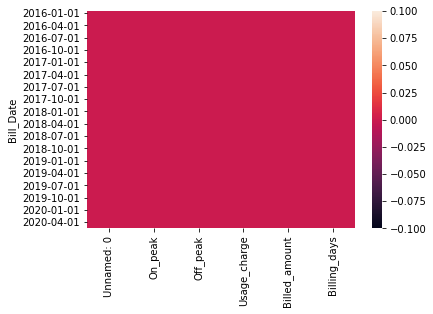

In [19]:
sns.heatmap(df.isna())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2016-01-01 to 2020-05-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53 non-null     int64  
 1   On_peak        53 non-null     int64  
 2   Off_peak       53 non-null     float64
 3   Usage_charge   53 non-null     float64
 4   Billed_amount  53 non-null     float64
 5   Billing_days   53 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.9+ KB


In [21]:
#train 
bill_2018 = df["2016":"2018"][["Billed_amount"]]

In [22]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


## Simple moving average = (t+(t-1)+(t-2)+...+(t-n))/n

In [27]:
bill_2018["ma_rolling_3_wo_shift"] = bill_2018["Billed_amount"].rolling(window=3).mean()

In [28]:
bill_2018

,Billed_amount,ma_rolling_3,ma_rolling_3_wo_shift
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,201.896667
2016-04-01,111.22,201.896667,156.393333
2016-05-01,118.37,156.393333,117.813333
2016-06-01,77.81,117.813333,102.466667
2016-07-01,86.67,102.466667,94.283333
2016-08-01,122.40,94.283333,95.626667
2016-09-01,223.62,95.626667,144.230000


<AxesSubplot:xlabel='Bill_Date'>

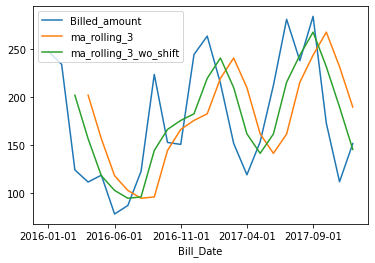

In [29]:
bill_2018.plot()

## Weighted moving average = giving weigths to your time stamps:

(t*weighting factor)+ (t-1)*weighting factor + ....../n


- sensitive to data points

- can identify trends sooner  than simple moving average 

- complexity : we have to assign weights

In [30]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [31]:
bill_2018["Billed_amount"].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))#weights need to add up to window size

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
Name: Billed_amount, dtype: float64

In [35]:
bill_2018["wma_rolling_3"] = bill_2018["Billed_amount"].rolling(window=3).apply(wma(np.array([0.3,0.7,2]))).shift(1)

In [36]:
bill_2018

,Billed_amount,ma_rolling_3,ma_rolling_3_wo_shift,wma_rolling_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN
2016-03-01,123.85,NaN,201.896667,NaN
2016-04-01,111.22,201.896667,156.393333,161.965333
2016-05-01,118.37,156.393333,117.813333,126.456000
2016-06-01,77.81,117.813333,102.466667,117.249667
2016-07-01,86.67,102.466667,94.283333,90.615000
2016-08-01,122.40,94.283333,95.626667,87.772667
2016-09-01,223.62,95.626667,144.230000,109.604000


<AxesSubplot:xlabel='Bill_Date'>

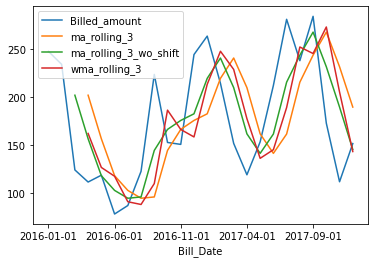

In [37]:
bill_2018.plot()

## Exponetial moving average = (lastvalue - previous ema)*(2/N+1) +previous ema

In [42]:
bill_2018["Billed_amount"].ewm(span=3,adjust=False,min_periods=0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
Name: Billed_amount, dtype: float64

In [43]:
bill_2018['ewm_window_3']=bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

<AxesSubplot:xlabel='Bill_Date'>

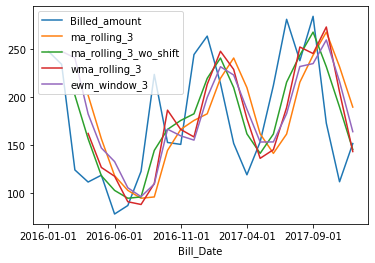

In [44]:
bill_2018.plot()

## Exponential Smoothing Average

In [45]:
bill_2018["Billed_amount"].ewm(alpha=0.7,adjust=False,min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
Name: Billed_amount, dtype: float64

In [46]:
bill_2018['esm_window_3_7']=bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [47]:
bill_2018

,Billed_amount,ma_rolling_3,ma_rolling_3_wo_shift,wma_rolling_3,ewm_window_3,esm_window_3_7
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,201.896667,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,156.393333,161.965333,182.385000,158.153800
2016-05-01,118.37,156.393333,117.813333,126.456000,146.802500,125.300140
2016-06-01,77.81,117.813333,102.466667,117.249667,132.586250,120.449042
2016-07-01,86.67,102.466667,94.283333,90.615000,105.198125,90.601713
2016-08-01,122.40,94.283333,95.626667,87.772667,95.934063,87.849514
2016-09-01,223.62,95.626667,144.230000,109.604000,109.167031,112.034854


<AxesSubplot:xlabel='Bill_Date'>

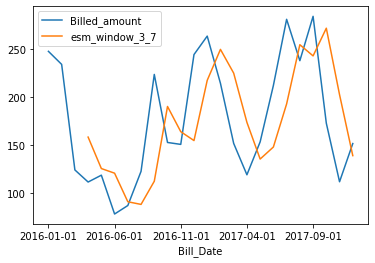

In [48]:
bill_2018[['Billed_amount','esm_window_3_7']].plot()

<AxesSubplot:xlabel='Bill_Date'>

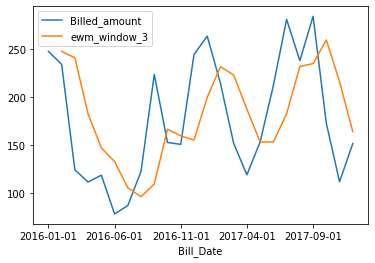

In [49]:
bill_2018[['Billed_amount','ewm_window_3']].plot()

In [50]:
bill_2018['esm_window_3_3']=bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False,min_periods=3).mean().shift(1)

<AxesSubplot:xlabel='Bill_Date'>

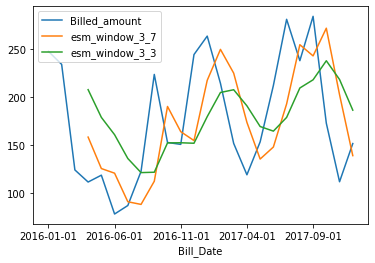

In [51]:
bill_2018[['Billed_amount','esm_window_3_7',"esm_window_3_3"]].plot()

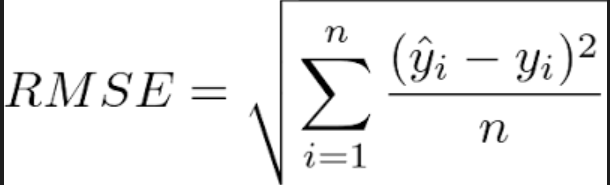

In [52]:
bill_2018

,Billed_amount,ma_rolling_3,ma_rolling_3_wo_shift,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,201.896667,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,156.393333,161.965333,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,117.813333,126.456000,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,102.466667,117.249667,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,94.283333,90.615000,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,95.626667,87.772667,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,144.230000,109.604000,109.167031,112.034854,121.459333


In [53]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.08439978804692

In [54]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

59.45345605228385

In [55]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

63.82199977577612

In [56]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

58.43390136619079

In [57]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

66.1439575207603